### Step 1: Download first 30 compounds from ToxCast API

We use the requests module to perform a normal HTTP GET request. The structure of the API is documented at the [official documentation](https://toxrefdb-api.cloud.douglasconnect.com/). We check if the status code is 200 (HTTP OK), then decode the returned Json

In [1]:
import requests

r = requests.get('http://toxcast-api.cloud.douglasconnect.com/beta/compounds?limit=30')
print("ToxCast Status code: {0}".format(r.status_code))
if r.status_code == 200:
    result = r.json()


ToxCast Status code: 200


### Step 2: Extract the InChIs, remove AuxInfo section
    
The compound data in the ToxCast API is not just the CAS Number, Chemcical name and CompTox identifier that 
is in the official data release, but also the official translation by the EPA to other identifiers, including
Smiles, InChIkey and InChIs. 

We extract the InChI and remove the AuxInfo that can be part of an InChI but confuses 
the rdkit drawing code below. This is done with a simple regex that cuts everything after and including the "AuxInfo" string

In [2]:
import re
auxInfoRemover = re.compile(r"^(.+)\n?AuxInfo.+$")

inchis = [ auxInfoRemover.sub(r"\1", compound['structureInChI']) for compound in result['compounds'] if compound['structureInChI'] != None ]

### Step 3: Draw molecules using RDKit

Finally, we use rdkit to draw the molecules as a grid. We use SVG for nice, resolution independent rendering.

If you are running this notebook locally, make sure to install rdkit first. You can install it from jupyter if you have the correct permissions using:

    !pip install rdkit

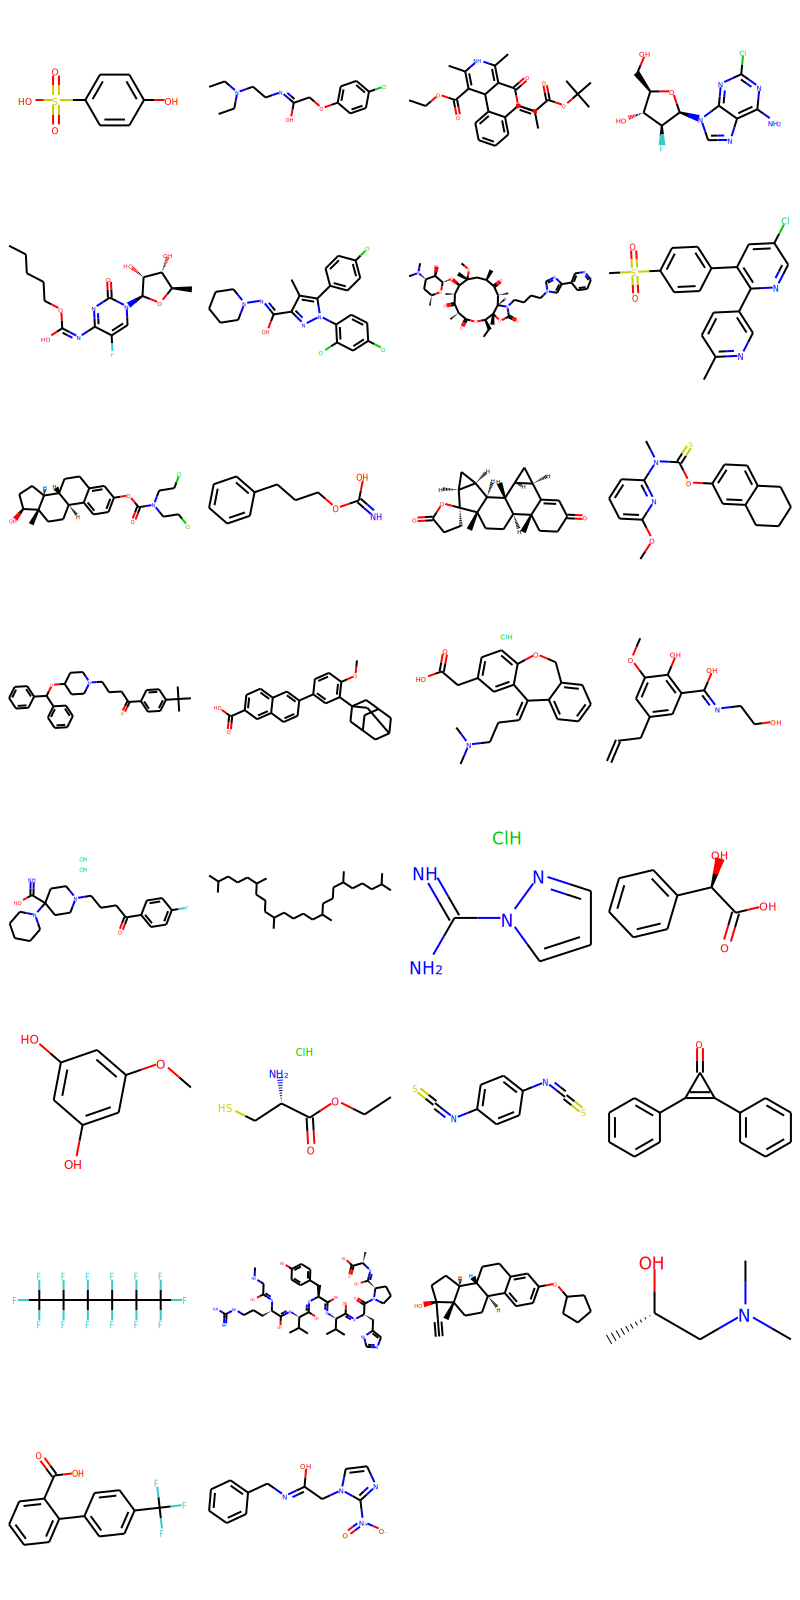

In [3]:
from rdkit.Chem import inchi
from rdkit.Chem import Draw
from IPython.display import SVG

mols = [ inchi.MolFromInchi(compoundInchi) for compoundInchi in inchis ]
SVG(Draw.MolsToGridImage(mols, molsPerRow=4, useSVG=True))